# LP IV - Assignment 2

Name    : Isha Kanade <br>
Roll no : 43135 <br>
Batch   : Q - 9

### Problem statement : 
Implementing Feedforward neural networks with Keras and TensorFlow

    a. Import the necessary packages
    b. Load the training and testing data (MNIST/CIFAR10)
    c. Define the network architecture using Keras
    d. Train the model using SGD
    e. Evaluate the network
    f. Plot the training loss and accuracy

In [1]:
# Importing the necessary packages
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

In [2]:
# Load the training and testing MNIST data
from keras import datasets
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

In [3]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


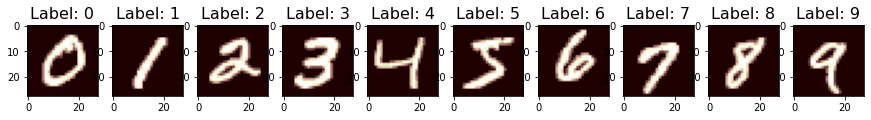

In [4]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(15,15))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='pink')
  #ax[i].set_title("Label: {}".format(i), fontsize=16)

In [5]:
for i in range(10):
  print(y_train[i])


5
0
4
1
9
2
1
3
1
4


In [6]:
from keras.utils.np_utils import to_categorical

In [7]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [8]:
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [9]:
# Normalize Data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [10]:
# Reshape Data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


In [11]:
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Dropout

In [12]:
#Define the network architecture using Keras
model = Sequential()
model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))

In [13]:
# Training the model using SGD
sgd = SGD(learning_rate=0.1, momentum=0)
model.compile(loss='categorical_crossentropy', optimizer= sgd, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(x=x_train, y=y_train, batch_size= 512, epochs= 100)

Epoch 1/50
118/118 [==============================] - 1s 5ms/step - loss: 0.8862 - accuracy: 0.7477
Epoch 2/50
118/118 [==============================] - 1s 5ms/step - loss: 0.4199 - accuracy: 0.8786
Epoch 3/50
118/118 [==============================] - 1s 6ms/step - loss: 0.3437 - accuracy: 0.9020
Epoch 4/50
118/118 [==============================] - 1s 6ms/step - loss: 0.2995 - accuracy: 0.9136
Epoch 5/50
118/118 [==============================] - 1s 5ms/step - loss: 0.2695 - accuracy: 0.9223
Epoch 6/50
118/118 [==============================] - 1s 5ms/step - loss: 0.2464 - accuracy: 0.9298
Epoch 7/50
118/118 [==============================] - 1s 5ms/step - loss: 0.2264 - accuracy: 0.9350
Epoch 8/50
118/118 [==============================] - 1s 5ms/step - loss: 0.2101 - accuracy: 0.9391
Epoch 9/50
118/118 [==============================] - 1s 5ms/step - loss: 0.1979 - accuracy: 0.9437
Epoch 10/50
118/118 [==============================] - 1s 5ms/step - loss: 0.1855 - accuracy: 0.9468

In [15]:
# Evaluating the model

test_loss, test_acc = model.evaluate(x_test, y_test)

print("\nTest Loss: {} \n\nTest Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 0s 900us/step - loss: 0.0725 - accuracy: 0.9764

Test Loss: 0.07254708558320999 

Test Accuracy: 0.9764000177383423


In [16]:
# Plot the training loss and accuracy

In [17]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


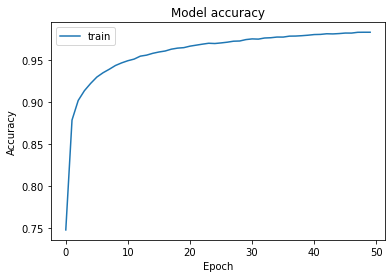

In [18]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


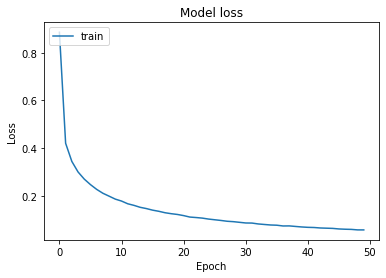

In [19]:
# summarize history for loss
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()